# Лабораторная работа №4
Сверточные нейронные сети: анализ изображений

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Загрузка и предварительная обработка данных
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормализация пикселей изображений от 0 до 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [2]:
model = models.Sequential()
# Добавление сверточных слоев и слоев подвыборки
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # Этот слой будет иметь 32 фильтра размером 3x3 пикселя
# Преимущества функции ReLU: простота вычисления, предотвращение проблемы исчезающего градиента
model.add(layers.MaxPooling2D((2, 2))) # уменьшает размерность карт признаков, которая выбирает максимальное значение из каждой области
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # представляет собой сверточный слой, который применяет набор фильтров (ядер) 
# к входному изображению для извлечения признаков.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Добавление полносвязных слоев
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Вывод архитектуры модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Альтернатива MaxPooling2D, это AveragePooling2D которая уменьшает размерность карт признаков путем вычисления среднего значения внутри каждой области
Вот как работает AveragePooling2D:

1. Разделяется входная карта признаков на несколько областей (например, 2x2 или 3x3 пикселя).

2. Для каждой области вычисляется среднее значение всех пикселей внутри этой области.

3. Результаты средних значений заменяют соответствующие области в выходной карте признаков.

In [3]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # используется в задачах многоклассовой классификации, когда метки классов представлены целыми числами.
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5403 - accuracy: 0.4355 - val_loss: 1.3008 - val_accuracy: 0.5340
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1954 - accuracy: 0.5728 - val_loss: 1.0921 - val_accuracy: 0.6096
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0509 - accuracy: 0.6302 - val_loss: 1.0234 - val_accuracy: 0.6445
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9594 - accuracy: 0.6624 - val_loss: 0.9815 - val_accuracy: 0.6558
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8848 - accuracy: 0.6889 - val_loss: 0.9604 - val_accuracy: 0.6642
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8315 - accuracy: 0.7091 - val_loss: 0.8768 - val_accuracy: 0.6969
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7804 - accuracy: 0.7277 - val_loss: 0.8643 -

<image src="https://vitalflux.com/wp-content/uploads/2023/04/cross-entropy-loss-for-multiclass-classification.png" alt="Формула">

С - количество классов.
yi - бинарная индикаторная переменная, равная 1, если класс i является истинным классом для данного примера, и 0 в противном случае.
pi - вероятность принадлежности примера к классу i, предсказанная моделью.

объединяет потери по всем классам для конкретного обучающего примера

логарифм в Sparse Categorical Crossentropy является частью математического и статистического формализма, который помогает выразить неопределенность в предсказаниях модели и обеспечивает эффективные вычисления и стабильность в обучении нейронных сетей.

Основная цель этой функции потерь - минимизировать разницу между вероятностями, предсказанными моделью, и истинными метками классов. Модель стремится увеличить вероятность правильного класса и уменьшить вероятности неправильных классов.

В отличие от CategoricalCrossentropy, которая ожидает целевые метки в форме векторов с одним активным битом (one-hot encoded), SparseCategoricalCrossentropy более эффективна с точки зрения использования памяти при работе с большим количеством классов, так как требует только целых чисел для представления целевых меток.


313/313 - 1s - loss: 0.8624 - accuracy: 0.7067 - 1s/epoch - 4ms/step
Точность на тестовых данных: 0.7067000269889832


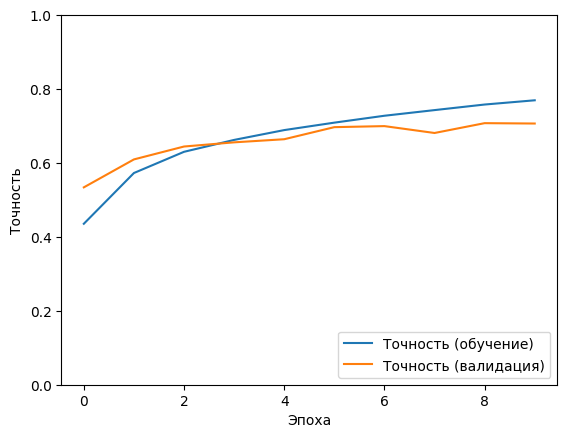

In [35]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Точность на тестовых данных: {test_acc}")

# Построение графика точности и потерь
plt.plot(history.history['accuracy'], label='Точность (обучение)')
plt.plot(history.history['val_accuracy'], label='Точность (валидация)')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.ylim([0, 1])
plt.legend(loc='lower right')

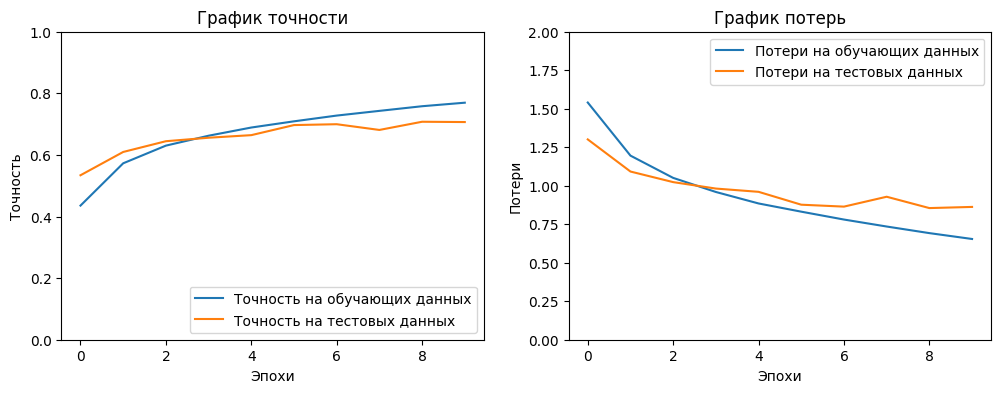

In [34]:
# Графики обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label = 'Точность на тестовых данных')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('График точности')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающих данных')
plt.plot(history.history['val_loss'], label = 'Потери на тестовых данных')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('График потерь')

plt.show()

In [10]:
# Сохранение модели
model.save('path_to_save_model.h5')

d:\Политех\7 семестр\machine_learning_Polytech\venv\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# Словарь классов CIFAR-10
cifar10_classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Путь к изображению
image_path = 'cat1.png'

# Загрузка изображения с преобразованием в RGBA для устранения проблемы палитры с прозрачностью
image = Image.open(image_path).convert('RGBA')

# Создание фона для удаления альфа-канала
background = Image.new('RGBA', image.size, (255, 255, 255))

# Слияние изображения с фоном для преобразования в RGB
image_rgb = Image.alpha_composite(background, image).convert('RGB')

# Изменение размера изображения до 32x32 пикселей
image_resized = image_rgb.resize((32, 32))

# Преобразование изображения в массив numpy
image_array = np.array(image_resized)

# Нормализация пикселей изображения
image_array = image_array / 255.0

# Добавление дополнительной размерности для пакета из одного изображения
image_array = np.expand_dims(image_array, axis=0)

# Загрузка предварительно обученной модели
model_path = 'path_to_save_model.h5'  # Укажите правильный путь к вашей модели
model = load_model(model_path)

# Предсказание с помощью модели
predictions = model.predict(image_array)

# Получение индекса класса с наибольшей вероятностью
predicted_class = np.argmax(predictions, axis=1)

# Вывод категории в соответствии с предсказанным классом
predicted_category = cifar10_classes[predicted_class[0]]
print(f"Модель предсказала, что изображение относится к категории: '{predicted_category}'.")

1/1 [==============================] - 0s 71ms/step
Модель предсказала, что изображение относится к категории: 'cat'.
